In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df

,name,abb,cte_exp,Tg,smiles
0,Poly(dimethyl siloxane),PDMS,0.000302,149,*O[Si](*)(C)C
1,Poly(ethyl methacrylate),PEMA,0.000090,338,*CC(*)(C)C(=O)OCC
2,Polyisobutylene,PIB,0.000183,202,*CC(*)(C)C
3,Poly(methyl methacrylate),PMMA,0.000060,317,*CC(*)(C)C(=O)OC
4,Polyamide6,PA6,0.000085,325,*CCCCCC(=O)N*
5,Polyacrylonitrile,PAN,0.000065,383,*CC(*)C#N
6,Poly(caprolactone),PCL,0.000165,207,*CCCCCC(=O)O*
7,Poly(chlorotrifluoroethylene),PCTFE,0.000055,360,*C(F)(F)C(*)(F)Cl
8,Poly(ether ether ketone),PEEK,0.000077,421,*Oc1ccc(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)cc1C(C)(C)C
9,Polyethylene terephthalate,PET,0.000070,350,*CCOC(=O)c1ccc(C(=O)O*)cc1


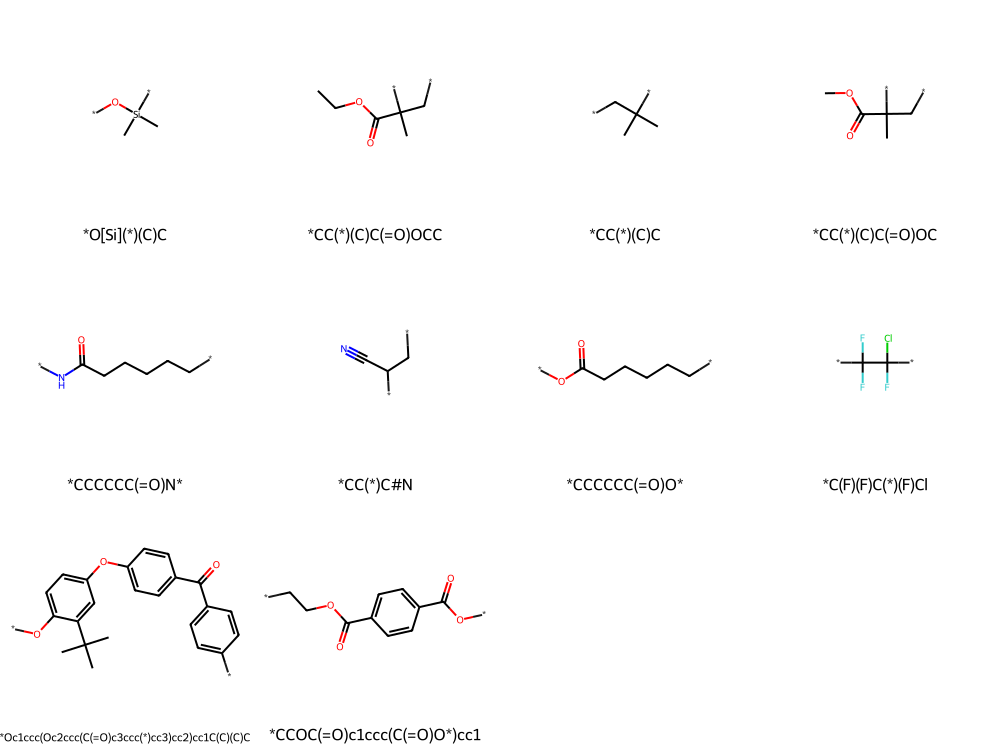

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(sm) for sm in df.smiles]

Draw.MolsToGridImage(
    mols, subImgSize=(250, 250), molsPerRow=4, legends=df.smiles.tolist()
)

[None, None, None, None, None, None, None, None, None, None]

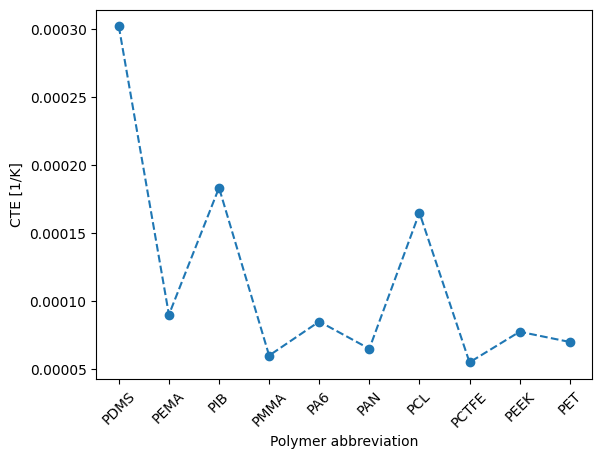

In [3]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)

ax.plot(df.abb, df.cte_exp, "o--")
ax.set_ylabel("CTE [1/K]")

ax.set_xlabel("Polymer abbreviation")
[tick.set_rotation(45) for tick in ax.get_xticklabels()]

In [4]:
df["cte_bs"] = 0.08 / df.Tg
df

,name,abb,cte_exp,Tg,smiles,cte_bs
0,Poly(dimethyl siloxane),PDMS,0.000302,149,*O[Si](*)(C)C,0.000537
1,Poly(ethyl methacrylate),PEMA,0.000090,338,*CC(*)(C)C(=O)OCC,0.000237
2,Polyisobutylene,PIB,0.000183,202,*CC(*)(C)C,0.000396
3,Poly(methyl methacrylate),PMMA,0.000060,317,*CC(*)(C)C(=O)OC,0.000252
4,Polyamide6,PA6,0.000085,325,*CCCCCC(=O)N*,0.000246
5,Polyacrylonitrile,PAN,0.000065,383,*CC(*)C#N,0.000209
6,Poly(caprolactone),PCL,0.000165,207,*CCCCCC(=O)O*,0.000386
7,Poly(chlorotrifluoroethylene),PCTFE,0.000055,360,*C(F)(F)C(*)(F)Cl,0.000222
8,Poly(ether ether ketone),PEEK,0.000077,421,*Oc1ccc(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)cc1C(C)(C)C,0.000190
9,Polyethylene terephthalate,PET,0.000070,350,*CCOC(=O)c1ccc(C(=O)O*)cc1,0.000229


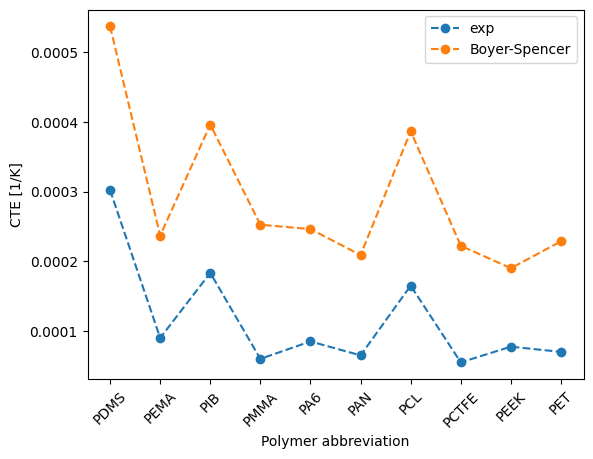

In [5]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)

ax.plot(df.abb, df.cte_exp, "o--", label="exp")
ax.plot(df.abb, df.cte_bs, "o--", label="Boyer-Spencer")
ax.set_ylabel("CTE [1/K]")


ax.set_xlabel("Polymer abbreviation")

[tick.set_rotation(45) for tick in ax.get_xticklabels()]
ax.legend()

cte = 0.035 / Tg


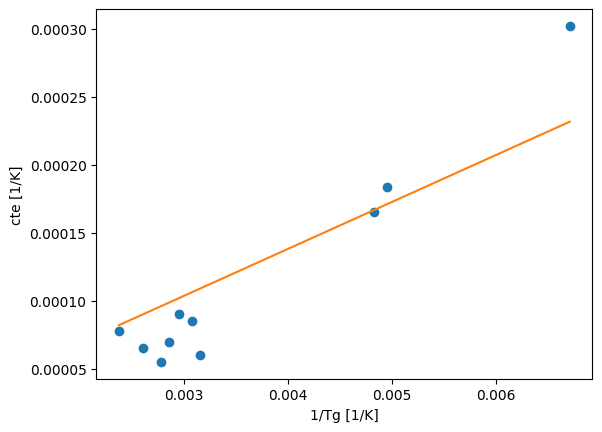

In [6]:
import numpy as np
from scipy.optimize import curve_fit

f, ax = plt.subplots(1, 1)
ax.plot(1 / df.Tg, df.cte_exp, "o", label="exp")
ax.set_ylabel("cte [1/K]")
ax.set_xlabel("1/Tg [1/K]")


def improved_rule(x, a):
    return a * x


params = curve_fit(improved_rule, 1 / df.Tg, df.cte_exp)
xp = np.linspace(1 / df.Tg.min(), 1 / df.Tg.max(), 100)

ax.plot(xp, improved_rule(xp, params[0]), "-")
print(f"cte = {params[0][0]:.3f} / Tg")

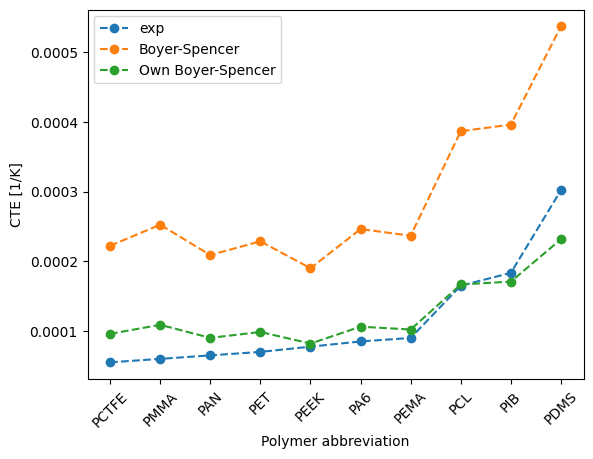

In [7]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)


df["cte_own"] = params[0][0] / df.Tg

df = df.sort_values("cte_exp")

ax.plot(df.abb, df.cte_exp, "o--", label="exp")
ax.plot(df.abb, df.cte_bs, "o--", label="Boyer-Spencer")
ax.plot(df.abb, df.cte_own, "o--", label="Own Boyer-Spencer")
ax.set_ylabel("CTE [1/K]")


ax.set_xlabel("Polymer abbreviation")

[tick.set_rotation(45) for tick in ax.get_xticklabels()]
ax.legend()